In [1]:
import pandas as pd
import geopandas as gpd
import numpy
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/danalapides/opt/miniconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/danalapides/opt/miniconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Ramsey 1160
Cienega 901


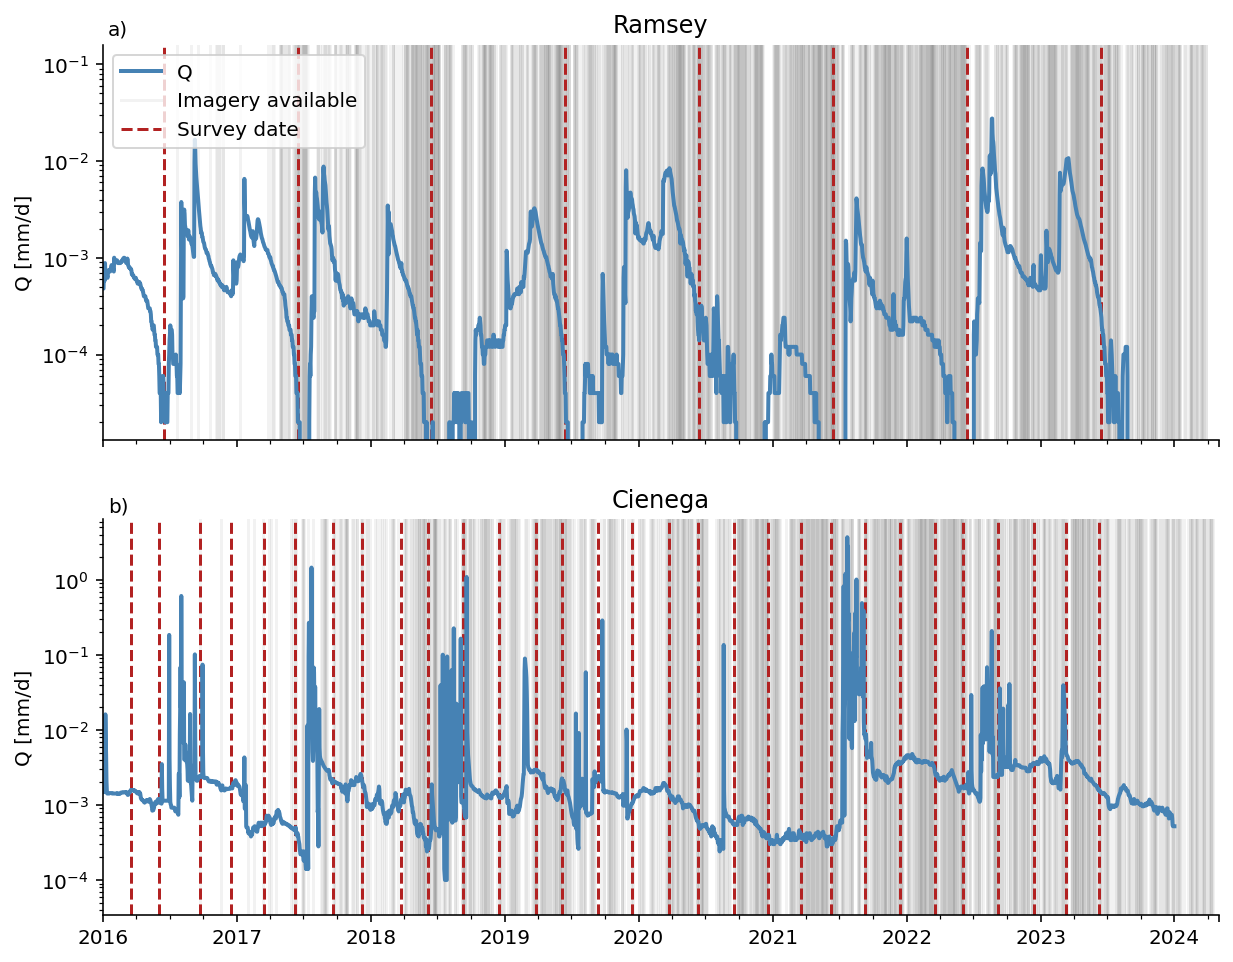

In [9]:
fig,axs = plt.subplots(2,figsize = (10,8),sharex=True)

locs = ['Ramsey','Cienega']
for i,loc in enumerate(locs):
    ax = axs[i]
    floc = '../data/'+loc+'/'+loc
    hydrodata = pd.read_csv(floc+'HydroData.csv',)
    try:
        hydrodata = hydrodata.rename(columns={'Unnamed: 0':'datetime'})
    except:
        continue
    hydrodata['datetime'] = pd.to_datetime(hydrodata['datetime'])
    hydrodata.set_index('datetime',inplace=True)
    hydrodata['Q [mm/d]'].plot(ax=ax,lw=2,c='steelblue',label='Q')

    imagedates = pd.read_csv(floc+'ImageryDates.csv')
    imagedates['date'] = pd.to_datetime(imagedates['date'])
    print(loc,len(imagedates))
    for j in range(len(imagedates)):
        if j==0:
            label = 'Imagery available'
        else:
            label = None
        ax.axvline(imagedates['date'].values[j],zorder=-2,alpha=.05,c='k',label = label)

    if loc=='Ramsey':
        surveyDates = [pd.to_datetime('6-15-'+str(y)) for y in range(2009,2024)]
    else:
        surveyDates = pd.read_csv(floc+'_survey_dates.csv')
        surveyDates['Cienega date'] = np.where(surveyDates['Cienega date'].isna(),
                                               surveyDates.mmddyyyy,
                                               surveyDates['Cienega date'])
        surveyDates['date'] = pd.to_datetime(surveyDates['Cienega date'])
        surveyDates = surveyDates['date'].values

    for j in range(len(surveyDates)):
        if j==0:
            label = 'Survey date'
        else:
            label = None
        ax.axvline(surveyDates[j],zorder = -2,c='firebrick',label=label,ls='--')

    
    ax.set_yscale('log')
    ax.set_title(loc)
    ax.set_xlabel('')
    ax.set_ylabel('Q [mm/d]')
    ax.set_xlim(pd.to_datetime('1-1-2016'),
                pd.to_datetime('5-1-2024'))

    if i==0:
        ax.legend()
        ax.text('2016-1-15',0.2,'a)')
    else:
        ax.text('2016-1-15',8,'b)')
        
for ax in axs:
    ax.spines[['top','right']].set_visible(False)
        
plt.savefig('data_availability.png',format='png',dpi=300,bbox_inches='tight')

In [10]:
imagedates.drop_duplicates()

,date
0,2016-09-22
1,2016-11-17
2,2017-01-30
3,2017-02-15
4,2017-03-13
...,...
896,2024-04-07
897,2024-04-10
898,2024-04-11
899,2024-04-13
